# Dataset 

In [ ]:
# Veri seti Acıklaması
# Veri seti Adı: Hmelq bir finans verisidir. İnsanların çeşitli niteliklere göre kredilerini ödeyip ödemedigi 
# bilgilerini tutar

#*BAD:The response(or Y) variable is BAD, which is coded as 0 (good risk) or 1 (bad risk).

#*LOAN: The amount of the loan requested( İstenen kredi miktarı) 
#(Daha az kredi talep eden adayların gelecekteki kredilerde temerrüde düşmeme ihtimalleri daha yüksek olmalıdır)

#*MORTDUE: How much the customer needs to pay on their mortgage(Müşterinin ipotek ödemesinde ne kadar ödeme yapması gerekiyor)
#(Daha az ipoteğe sahip olan başvuru sahiplerinin gelecekteki kredilerde temerrüde düşmeme ihtimalleri daha yüksek) 

#*VALUE: Assessed valuation (Değerlendirilen değer, geçerli vergileri ölçmek için bir mülke atanan dolar değeridir)
#(Mevcut mülkün değeri daha düşükse, gelecekteki kredilerde temerrüde düşme olasılığı daha az olmalıdır)

#*REASON: Debt consolidation or home improvement (DebtCon or HomeImp) (Ödemesi gelen borcu ertelemekj için alınan kredi)
#(Krediyi kullanma sebebinin temerrüde düşme şansı üzerinde de etkisi olabilir)

#*JOB: Broad job category
#*YOJ: Years on the job

#*DEROG: Number of derogatory reports (Negatif bir rapor , ödemeni geç yaparsan , ödemezsen vb.)
#(Aşağılayıcı raporlar kredi geçmişinde her zaman olumsuz bir işarettir ve bu sütundaki herhangi 
 #bir sayı gelecekte yüksek varsayılan temerrüt şansını göstermelidir.)
    
#*DELINQ: The number of delinquent trade lines (or credit accounts) (Aylık ödemesini 30günden fazla geciktirme sayısı)
#(Bir kişi geçmişte birkaç kez temerrüde düşmüş olsaydı, temerrüt şansı daha yüksek olurdu)
#(Ödenmemiş borçların sayısı)

#*CLAGE: Age of oldest trade line (oldest tradeline= credit account)
#*NINQ: Number of recent credit inquiries (Soft inquiries are usually made when you request a credit report or credit score for yourself.)
#*CLNO: Number of trade lines

#*DEBTINC: Debt to income ratio (Borç - Gelir oranı. Aylık toplam borcunun aylık toplam gelirine bölümü ile çıkarılan yüzdelik oran)
#(Bir kişinin gelir konusunda yüksek borcu varsa, o kişinin daha fazla borç geri ödemesi zor olacaktır, 
#bu nedenle bu rakamdaki yüksek bir rakam temerrüt)

In [1]:
# İmport Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
hmelq=pd.read_csv("hmelq.csv")
hmelq.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
hmelq.shape

(3576, 13)

In [4]:
hmelq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [5]:
hmelq.dtypes

bad          int64
loan         int64
mortdue    float64
value      float64
reason      object
job         object
yoj        float64
derog      float64
delinq     float64
clage      float64
ninq       float64
clno       float64
debtinc    float64
dtype: object

In [6]:
# veri setindeki numeric degiskenleri secip özet istatistiklere bakıldı
df_num=hmelq.select_dtypes(include=['float64','int64'])
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [7]:
# veri setindeki kategorik degiskenler secilir
cat_df=hmelq.select_dtypes(include=["category"])
cat_df

""
0
1
2
3
4
...
3571
3572
3573
3574


In [8]:
#hmelq.bad=pd.Categorical(hmelq.bad)
hmelq.reason=pd.Categorical(hmelq.reason)
hmelq.job=pd.Categorical(hmelq.reason)
hmelq.dtypes

bad           int64
loan          int64
mortdue     float64
value       float64
reason     category
job        category
yoj         float64
derog       float64
delinq      float64
clage       float64
ninq        float64
clno        float64
debtinc     float64
dtype: object

In [9]:
# kategorik degiskenlerin frekans bilgisi 
print(hmelq["bad"].value_counts())
print(hmelq["reason"].value_counts())
print(hmelq["job"].value_counts())


0    2863
1     713
Name: bad, dtype: int64
DebtCon    2371
HomeImp    1058
Name: reason, dtype: int64
DebtCon    2371
HomeImp    1058
Name: job, dtype: int64


In [10]:
#  Exploratory Data Analysis (EDA)

In [11]:
# degiskenlerin  birbiriyle olan korelasyonlarına bakıldı 
df_num.corr()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.071523,-0.056226,-0.050254,-0.051532,0.270980,0.345548,-0.150367,0.174759,-0.008981,0.236738
loan,-0.071523,1.000000,0.229546,0.337453,0.123293,-0.001463,-0.021577,0.089030,0.048633,0.092377,0.093636
mortdue,-0.056226,0.229546,1.000000,0.873280,-0.089949,-0.053310,-0.004971,0.141236,0.029452,0.340139,0.167358
value,-0.050254,0.337453,0.873280,1.000000,0.002501,-0.057279,-0.011014,0.182226,-0.005191,0.290439,0.134187
yoj,-0.051532,0.123293,-0.089949,0.002501,1.000000,-0.073500,0.065401,0.184283,-0.067735,0.017809,-0.052290
derog,0.270980,-0.001463,-0.053310,-0.057279,-0.073500,1.000000,0.234706,-0.083755,0.163750,0.048631,0.032324
delinq,0.345548,-0.021577,-0.004971,-0.011014,0.065401,0.234706,1.000000,0.044245,0.081166,0.151996,0.076943
clage,-0.150367,0.089030,0.141236,0.182226,0.184283,-0.083755,0.044245,1.000000,-0.113367,0.221071,-0.042852
ninq,0.174759,0.048633,0.029452,-0.005191,-0.067735,0.163750,0.081166,-0.113367,1.000000,0.097669,0.133751
clno,-0.008981,0.092377,0.340139,0.290439,0.017809,0.048631,0.151996,0.221071,0.097669,1.000000,0.180983


In [12]:
# degiskenlere ait histogram grafikleri

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


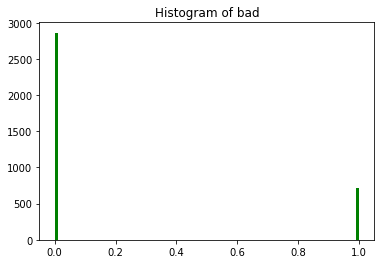

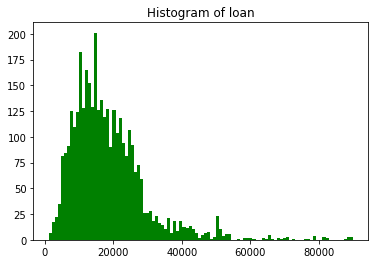

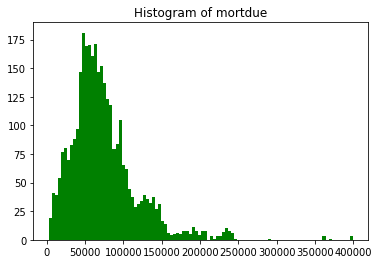

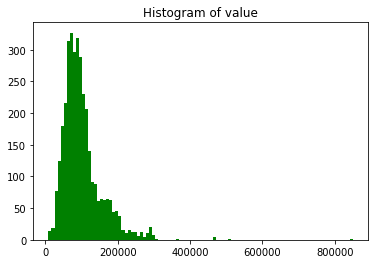

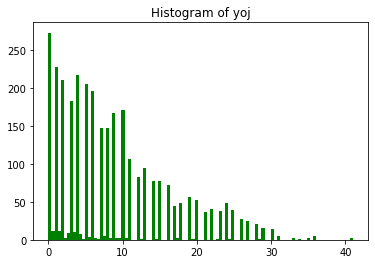

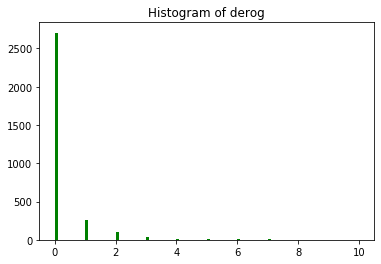

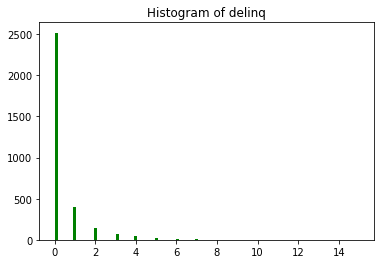

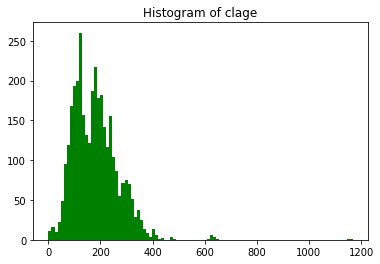

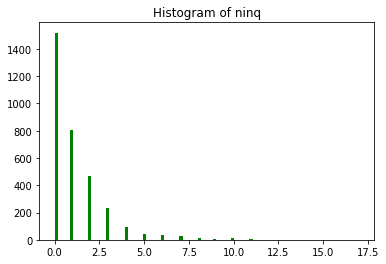

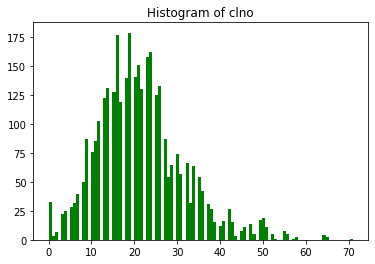

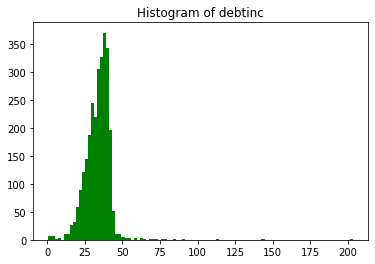

In [13]:
for i in df_num.columns:
    plt.figure()
    plt.hist(df_num[i],bins=100,color="green")
    plt.title("Histogram of "+ i)
    

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


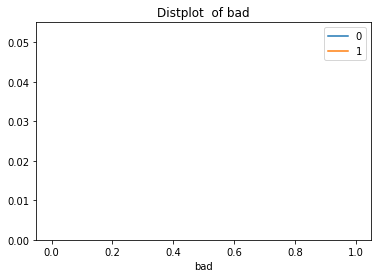

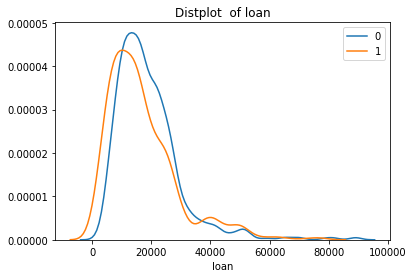

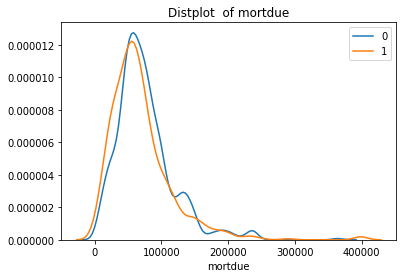

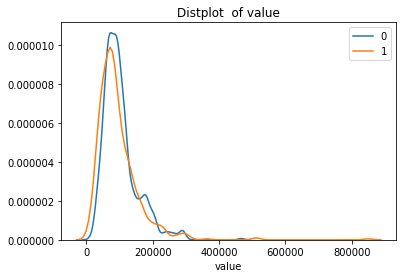

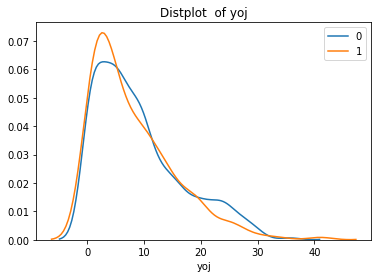

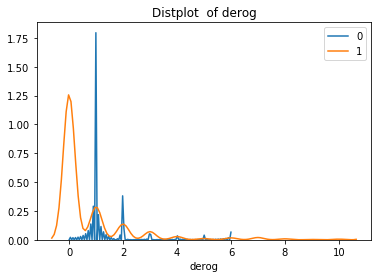

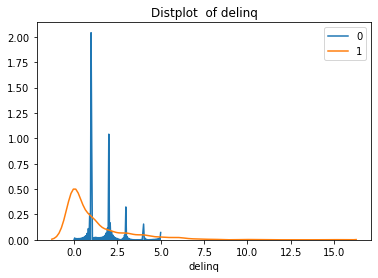

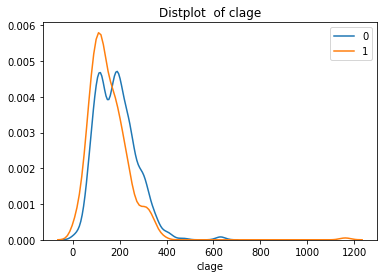

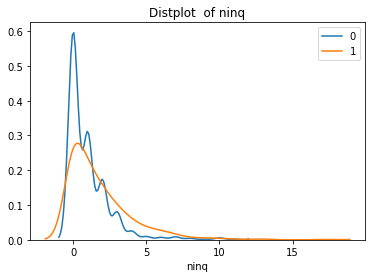

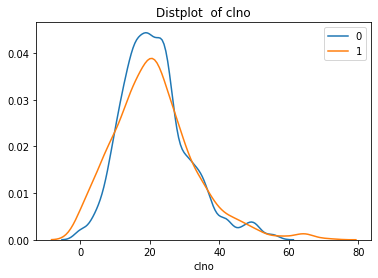

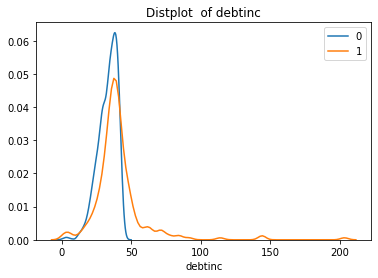

In [14]:

for i in  df_num.columns:
    plt.figure()
    sns.distplot(df_num[i][df_num["bad"] == 0],label=0, hist=False)
    sns.distplot(df_num[i][df_num["bad"] == 1],label=1, hist=False)
    plt.title("Distplot  of "+ i)
    plt.legend()

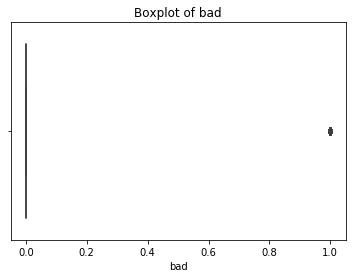

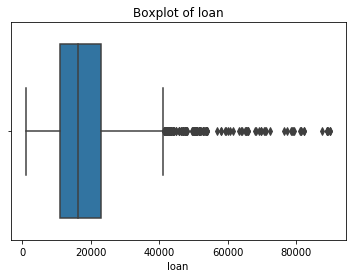

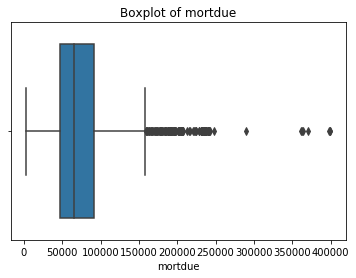

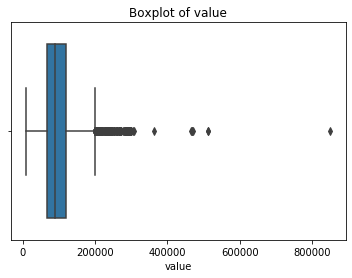

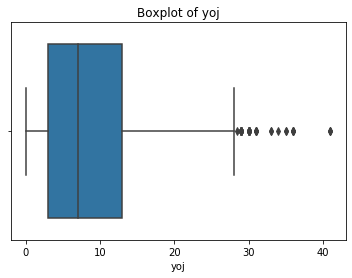

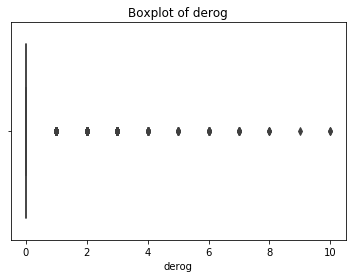

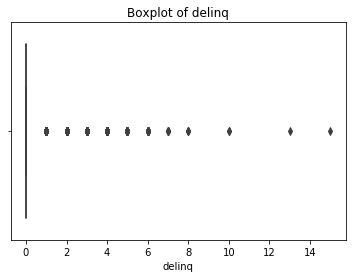

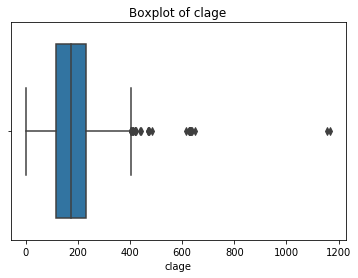

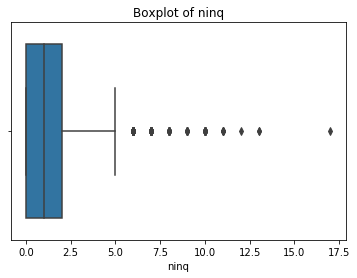

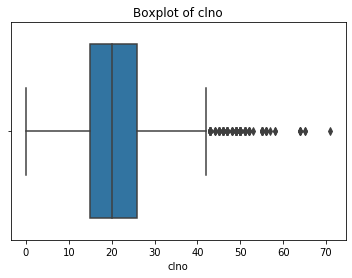

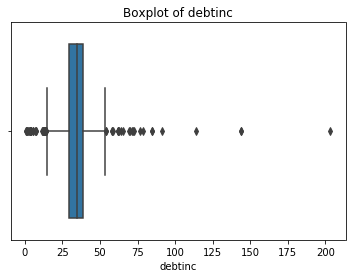

In [15]:
# Degiskenlerin 
for i in df_num.columns:
    plt.figure()
    sns.boxplot( hmelq[i])
    plt.title("Boxplot of "+ i)


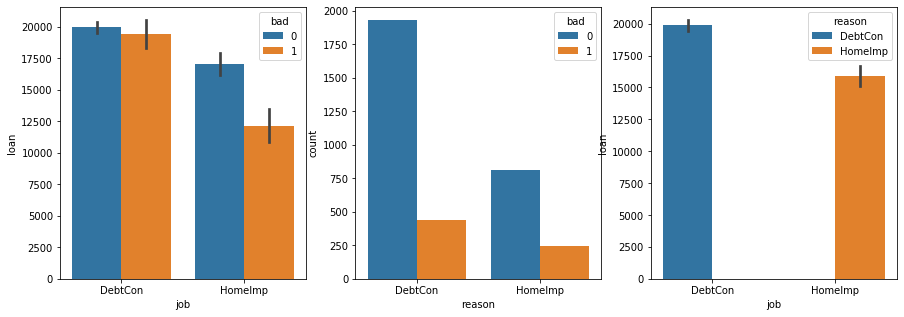

In [16]:
# Kategorik degiskenlerin frekans bilgisi barplot ve countplot yardımıyla çıkarıldı 
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
sns.barplot(x='job', y='loan', hue='bad', data=hmelq, ax=ax[0])
sns.countplot('reason', hue='bad', data=hmelq, ax=ax[1])
sns.barplot(x='job', y='loan', hue='reason', data=hmelq, ax=ax[2])
#plt.tight_layout()

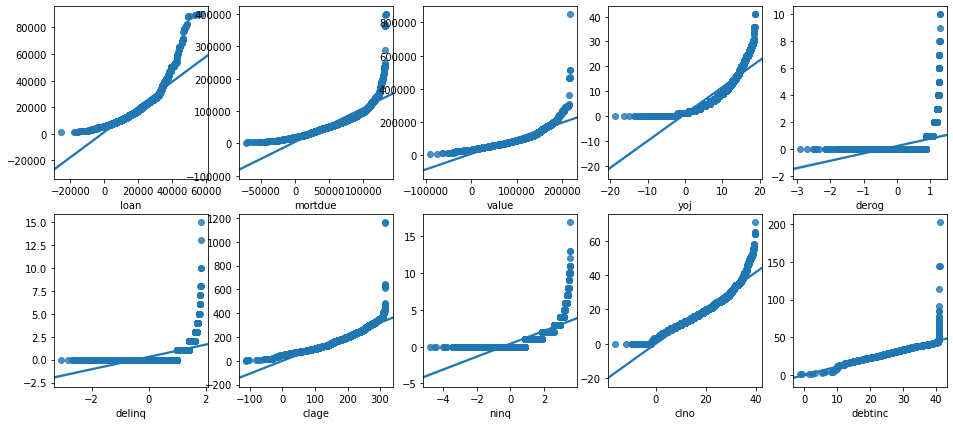

In [22]:
plt.figure(figsize=(16, 7))
for i, column in enumerate(df_num.select_dtypes(exclude=['category']).columns[1:], 1):
    plt.subplot(2, 5, i)
    randNorm = np.random.normal(np.mean(df_num[column]), np.std(df_num[column]), len(df_num[column]))
    sns.regplot(np.sort(randNorm), np.sort(df_num[column]))
    plt.xlabel(f'{column}')


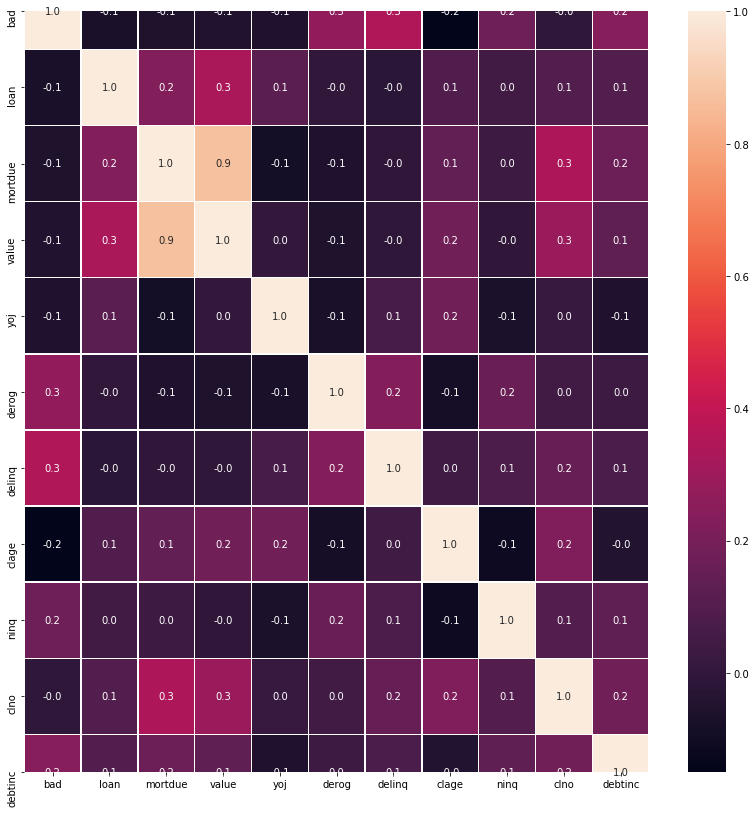

In [29]:
# Korelasyon degerlerine heatmap yardımıyla bakıyoruz
f,ax = plt.subplots(figsize=(14,14))
sns.heatmap(df_num.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)


C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


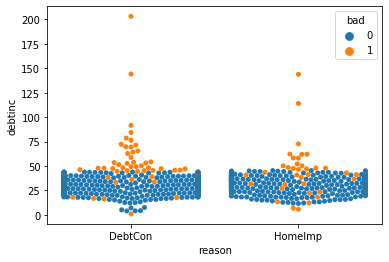

In [33]:

sns.swarmplot(x="reason", y="debtinc",hue="bad", data=hmelq)


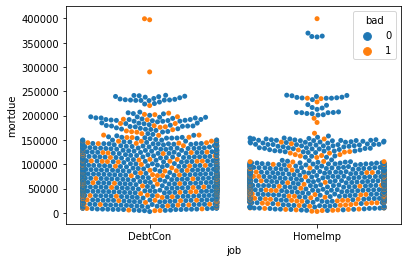

In [38]:
sns.swarmplot(x="job", y="mortdue",hue="bad", data=hmelq)


C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


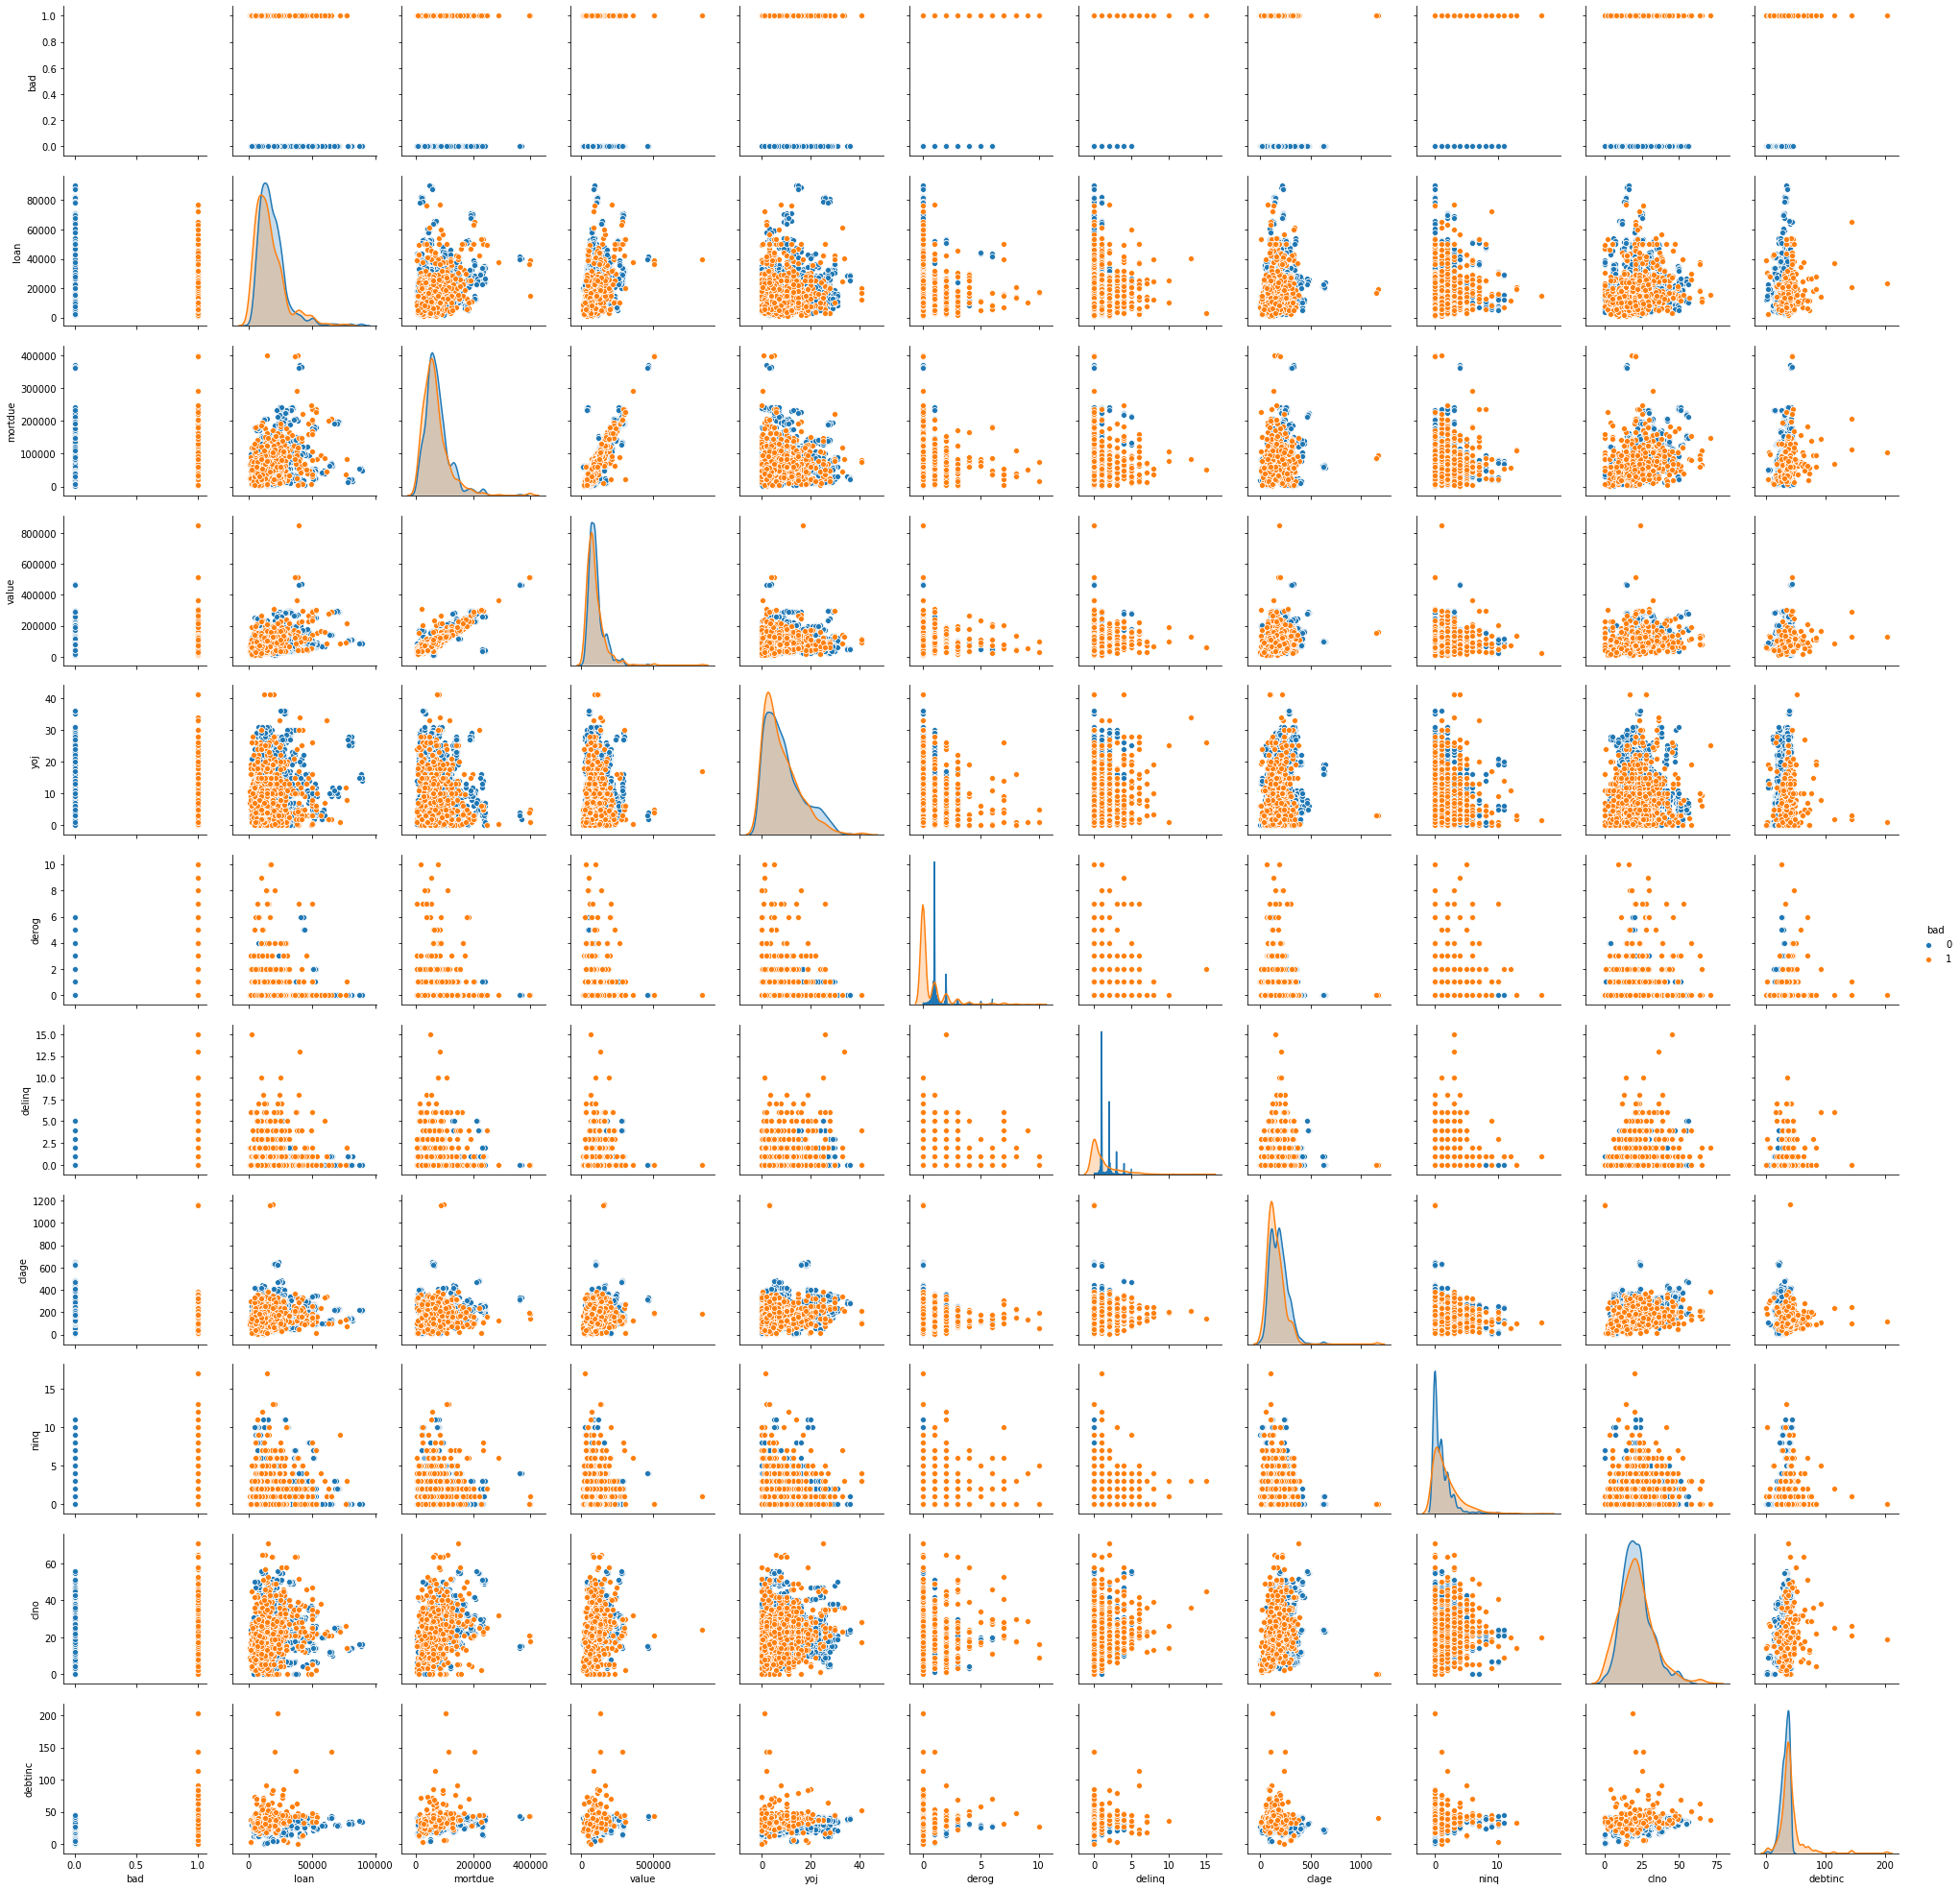

In [37]:
sns.pairplot(data=df_num,hue="bad")